In [202]:
from pandas import read_csv
from numpy import mean
from matplotlib.pyplot import show , xlabel , ylabel , plot , title , figure , legend
from tensorflow.keras import layers , models
from tensorflow.keras.metrics import mean_absolute_error , mean_squared_error
from tensorflow.data import Dataset

In [203]:
path = "D:\\datasets\\Turkey-Mugla\\Bodrum.csv"
file = read_csv(path)
df = file.copy()
df.head(10)

,ID,Date,Location,Latitude,Longtitude,Magnitude,Depth,Record date
0,1,5/10/2005 2:17,BODRUM (MUGLA),37.1080,27.4472,2.9,22.3,01:52.6
1,2,5/22/2005 5:33,KARAOVA-BODRUM (MUGLA),37.0642,27.7608,3.4,16.7,01:52.6
2,3,5/25/2005 7:25,TURGUTREiS-BODRUM (MUGLA),37.0065,27.2640,3.2,23.1,01:52.6
3,4,6/20/2005 13:41,KARAOVA-BODRUM (MUGLA),37.1547,27.6932,2.7,18.3,01:52.7
4,5,7/6/2005 21:36,KARAOVA-BODRUM (MUGLA),37.1000,27.8100,2.8,15.5,01:52.8
5,6,7/18/2005 14:06,ORTAKENT-BODRUM (MUGLA),37.0402,27.3120,2.9,39.4,01:52.8
6,7,7/20/2005 12:00,BODRUM (MUGLA),37.0073,27.3917,3.0,31.5,01:52.8
7,8,7/27/2005 1:37,KARAOVA-BODRUM (MUGLA),37.1078,27.7930,2.7,15.0,01:52.8
8,9,9/12/2005 8:56,KARAOVA-BODRUM (MUGLA),37.0723,27.7745,2.8,31.5,01:52.9
9,10,9/25/2005 16:23,ORTAKENT-BODRUM (MUGLA),37.0923,27.3235,3.0,22.4,01:52.9


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           2925 non-null   int64  
 1   Date         2925 non-null   object 
 2   Location     2925 non-null   object 
 3   Latitude     2925 non-null   float64
 4   Longtitude   2925 non-null   float64
 5   Magnitude    2925 non-null   float64
 6   Depth        2925 non-null   float64
 7   Record date  2925 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 182.9+ KB


# working on Magnitude column

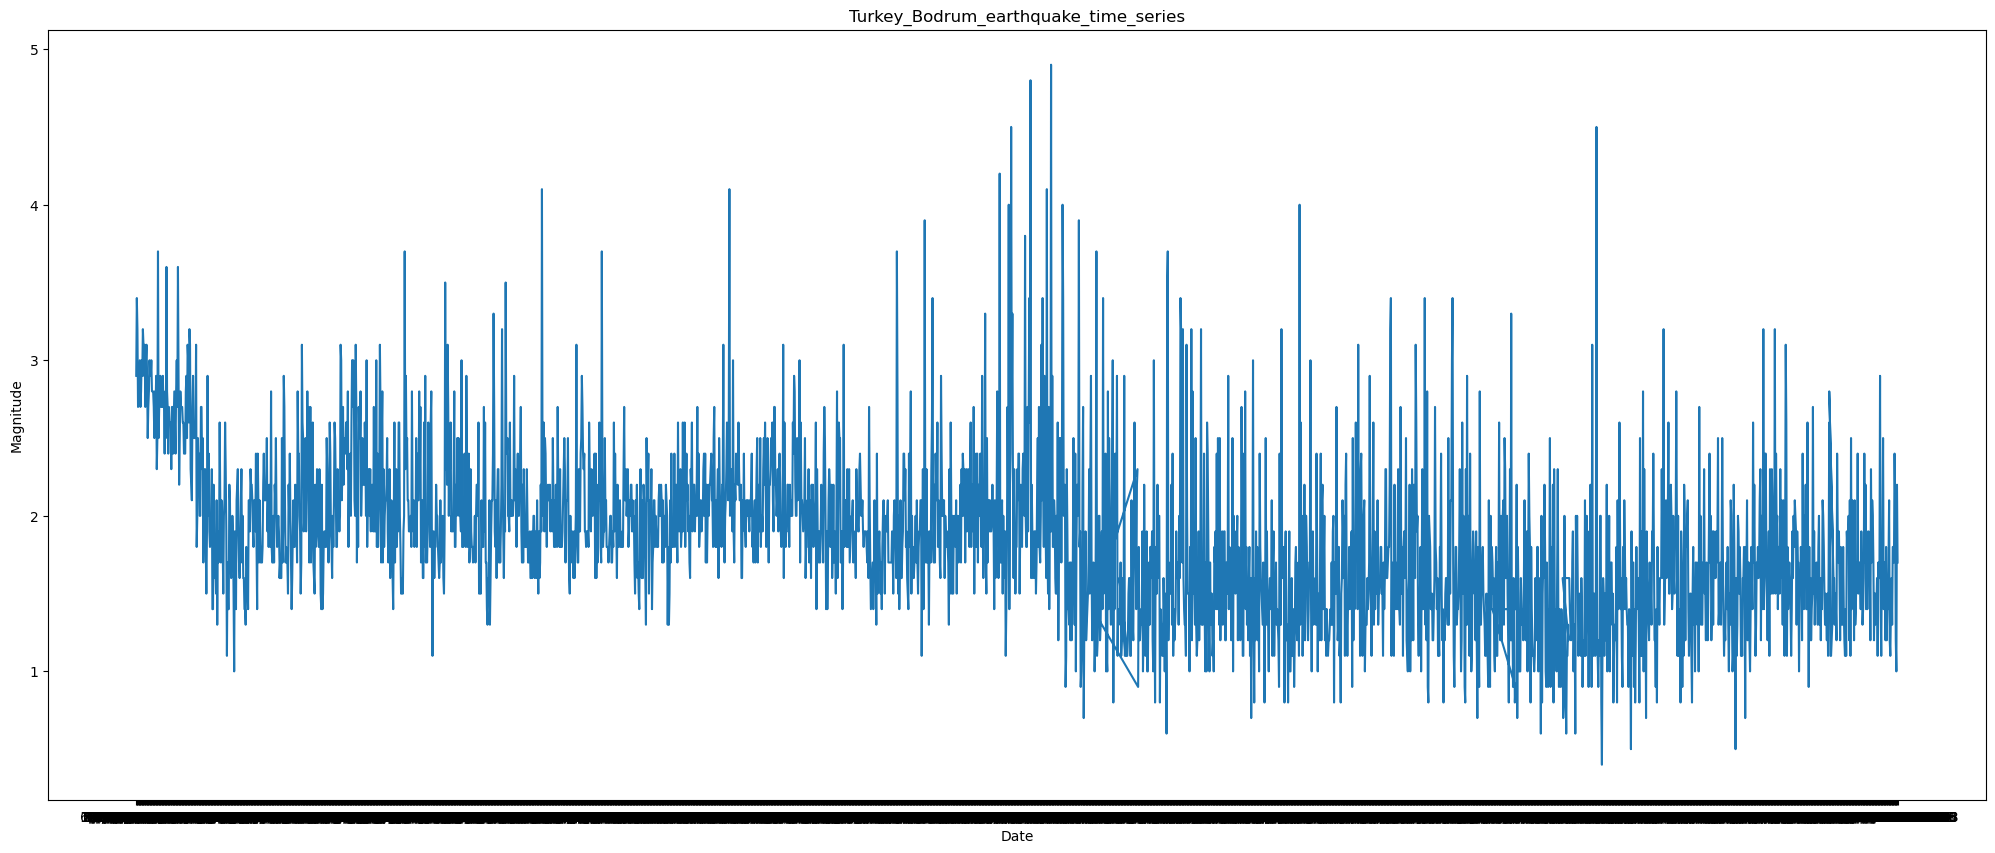

In [205]:
figure(figsize=(25,10))
plot(df.Date,df.Magnitude)
xlabel('Date')
ylabel('Magnitude')
title('Turkey_Bodrum_earthquake_time_series')
show()

In [206]:
idx = (int(input('Enter train size:'))*len(df))//100
xtr = df.Magnitude.to_list()[:idx]
xts = df.Magnitude.to_list()[idx:]

Enter train size:80


In [207]:
if len(xtr)+len(xts)==len(df):
    print(f'Train size: {len(xtr)}\nTest size: {len(xts)}')

Train size: 2340
Test size: 585


In [208]:
dataset_tr = Dataset.from_tensor_slices(xtr)
dataset_tr = dataset_tr.window(30,shift=1,drop_remainder=True)
dataset_tr = dataset_tr.flat_map(lambda x : x.batch(30))
dataset_tr = dataset_tr.map(lambda x :(x[:-1],x[-1]))
dataset_tr = dataset_tr.shuffle(30)
dataset_tr = dataset_tr.batch(60).prefetch(1)

In [209]:
dataset_ts = Dataset.from_tensor_slices(df.Magnitude.to_list())
dataset_ts = dataset_ts.window(30,shift=1,drop_remainder=True)
dataset_ts = dataset_ts.flat_map(lambda x : x.batch(30))
dataset_ts = dataset_ts.batch(60).prefetch(1)

In [210]:
def Create_model()->None :
    '''function docstring'''
    model = models.Sequential([layers.SimpleRNN(40,return_sequences=True,input_shape=[None,1]),
                               layers.SimpleRNN(40),
                               layers.Dense(1)])
    model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['mae'])
    return model

In [211]:
history = Create_model().fit(dataset_tr,epochs=100)

Epoch 1/100
39/39 [==============================] - 1s 9ms/step - loss: 0.3400 - mae: 0.4018
Epoch 2/100
39/39 [==============================] - 0s 7ms/step - loss: 0.2618 - mae: 0.3693
Epoch 3/100
39/39 [==============================] - 0s 7ms/step - loss: 0.2502 - mae: 0.3648
Epoch 4/100
39/39 [==============================] - 0s 7ms/step - loss: 0.2393 - mae: 0.3588
Epoch 5/100
39/39 [==============================] - 0s 7ms/step - loss: 0.2340 - mae: 0.3567
Epoch 6/100
39/39 [==============================] - 0s 7ms/step - loss: 0.2381 - mae: 0.3560
Epoch 7/100
39/39 [==============================] - 0s 7ms/step - loss: 0.2345 - mae: 0.3542
Epoch 8/100
39/39 [==============================] - 0s 6ms/step - loss: 0.2351 - mae: 0.3550
Epoch 9/100
39/39 [==============================] - 0s 5ms/step - loss: 0.2274 - mae: 0.3496
Epoch 10/100
39/39 [==============================] - 0s 5ms/step - loss: 0.2394 - mae: 0.3575
Epoch 11/100
39/39 [==============================] - 0s 5m

39/39 [==============================] - 0s 4ms/step - loss: 0.1477 - mae: 0.2867
Epoch 88/100
39/39 [==============================] - 0s 5ms/step - loss: 0.1500 - mae: 0.2893
Epoch 89/100
39/39 [==============================] - 0s 6ms/step - loss: 0.1469 - mae: 0.2866
Epoch 90/100
39/39 [==============================] - 0s 5ms/step - loss: 0.1428 - mae: 0.2832
Epoch 91/100
39/39 [==============================] - 0s 5ms/step - loss: 0.1424 - mae: 0.2829
Epoch 92/100
39/39 [==============================] - 0s 6ms/step - loss: 0.1436 - mae: 0.2847
Epoch 93/100
39/39 [==============================] - 0s 6ms/step - loss: 0.1391 - mae: 0.2817
Epoch 94/100
39/39 [==============================] - 0s 5ms/step - loss: 0.1371 - mae: 0.2779
Epoch 95/100
39/39 [==============================] - 0s 5ms/step - loss: 0.1399 - mae: 0.2808
Epoch 96/100
39/39 [==============================] - 0s 5ms/step - loss: 0.1357 - mae: 0.2762
Epoch 97/100
39/39 [==============================] - 0s 4ms/st

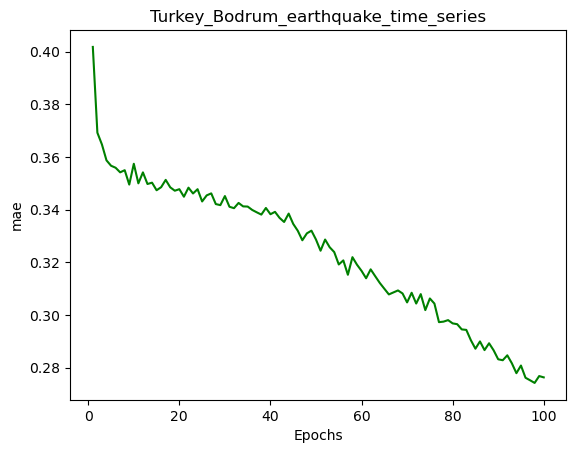

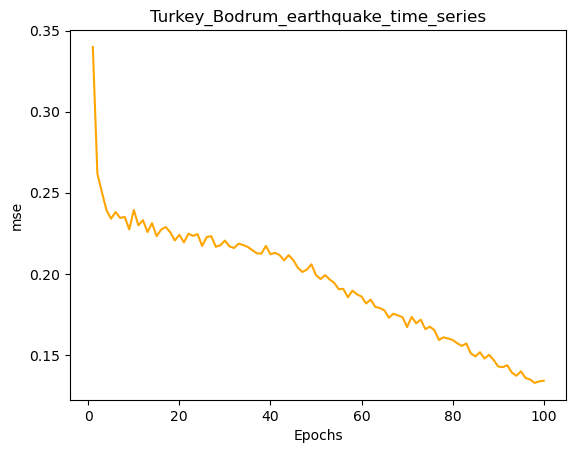

In [212]:
#Visualize models performance.
epoch = range(1,len(history.epoch)+1)
results = history.history
plot(epoch,results['mae'],'green')
xlabel('Epochs')
ylabel('mae')
title('Turkey_Bodrum_earthquake_time_series')
show()
plot(epoch,results['loss'],'orange')
xlabel('Epochs')
ylabel('mse')
title('Turkey_Bodrum_earthquake_time_series')
show()

In [220]:
preds_ts = Create_model().predict(dataset_ts)

49/49 [==============================] - 0s 5ms/step


In [221]:
true_preds = preds_ts[idx-30:-1]
mse = mean(mean_squared_error(xts,true_preds).numpy()[0])
mae = mean(mean_absolute_error(xts,true_preds).numpy()[0])
message = 'mse : %2.f , mae : %2.f'%(mse,mae)
print(message)

mse :  0 , mae :  1


In [222]:
temp = []
for i in true_preds.ravel():
    if i<0 :
        temp.append(0)
        continue
    temp.append(i)
true_preds = temp

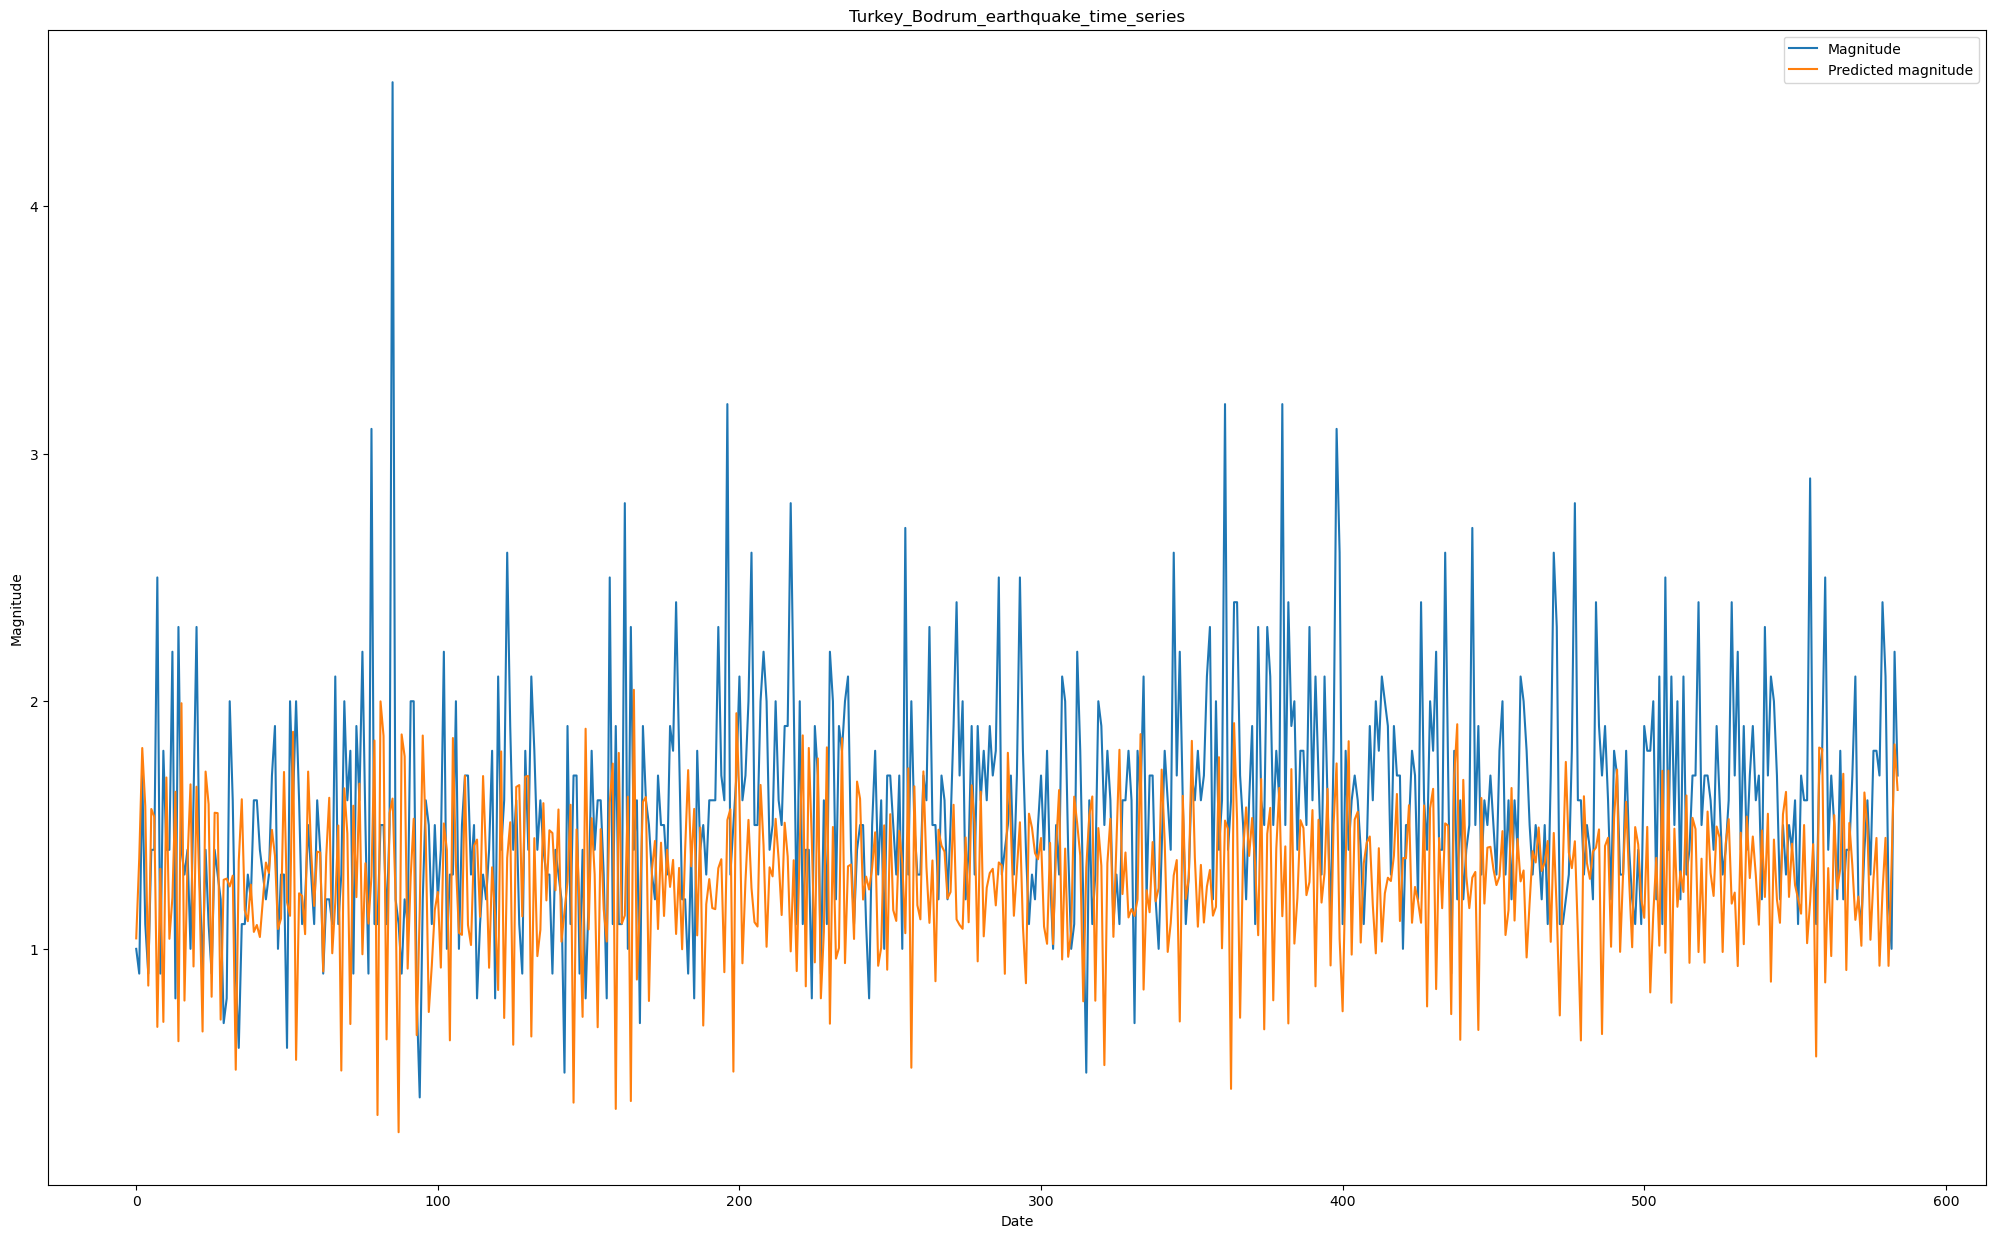

In [223]:
figure(figsize=(25,15))
plot(range(len(xts)),xts)
plot(range(len(true_preds)),true_preds)
title('Turkey_Bodrum_earthquake_time_series')
xlabel('Date')
ylabel('Magnitude')
legend(['Magnitude','Predicted magnitude'])
show()

# working on Depth column

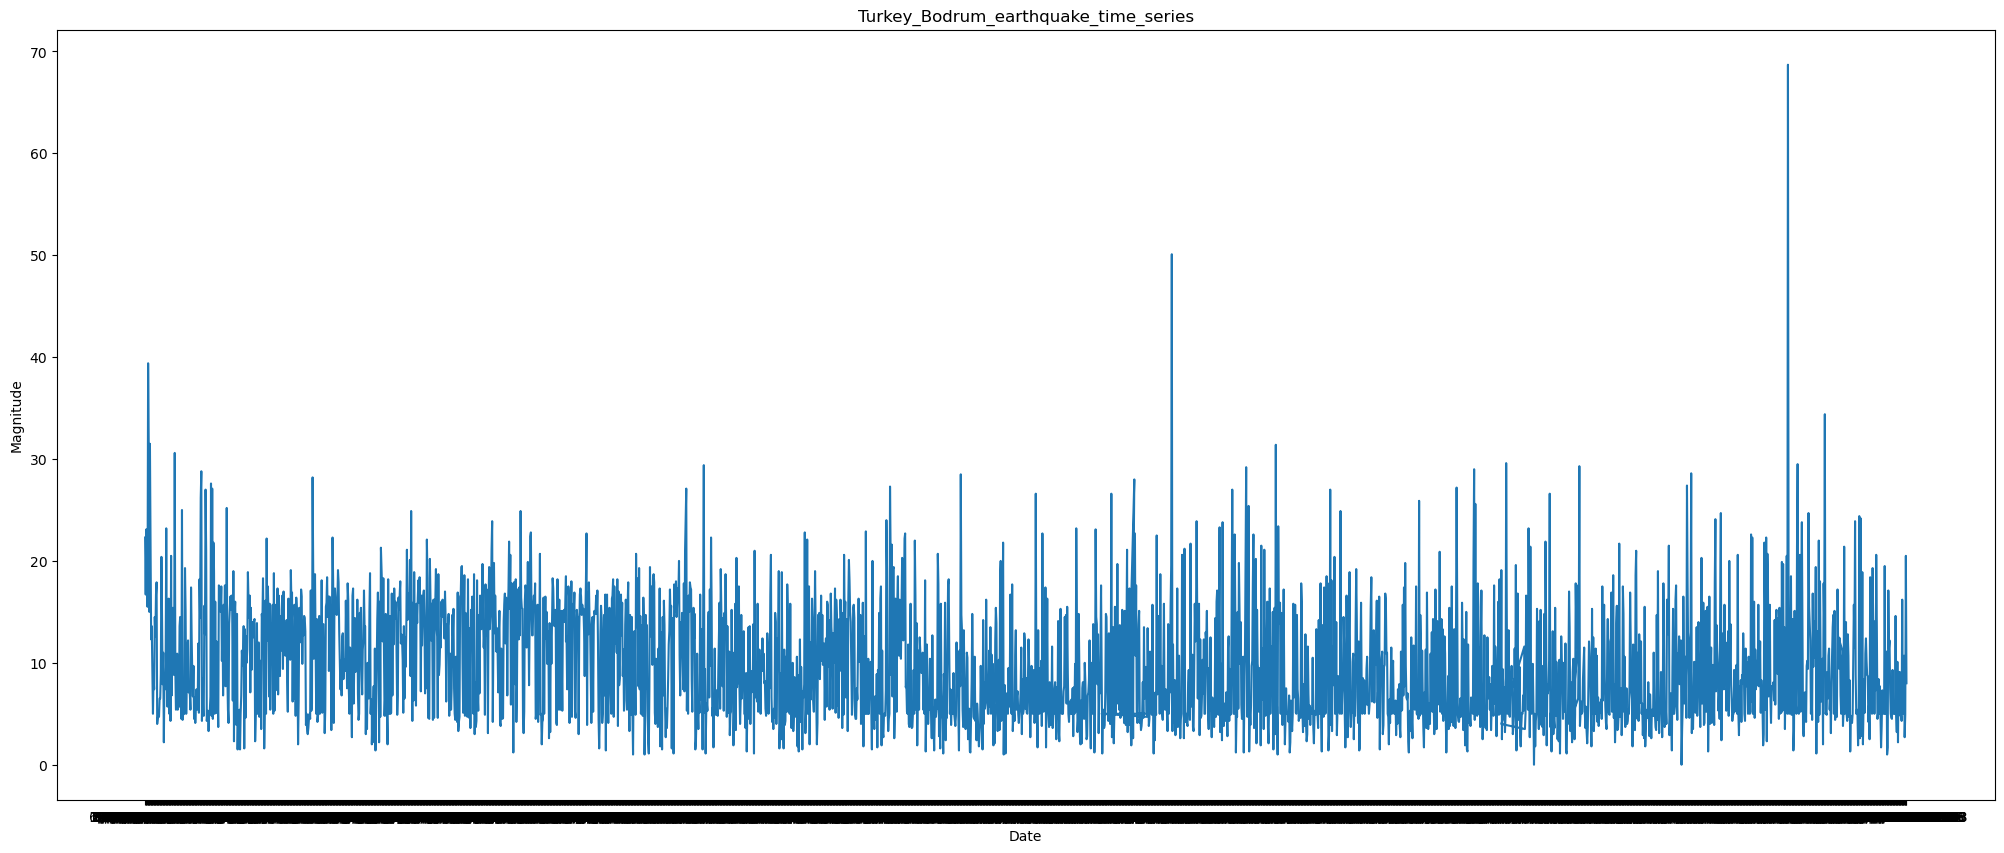

In [224]:
figure(figsize=(25,10))
plot(df.Date,df.Depth)
xlabel('Date')
ylabel('Magnitude')
title('Turkey_Bodrum_earthquake_time_series')
show()

In [305]:
idx = (int(input('Enter train size:'))*len(df))//100
xtr = df.Depth.to_list()[:idx]
xts = df.Depth.to_list()[idx:]

Enter train size:80


In [306]:
if len(xtr)+len(xts)==len(df):
    print(f'Train size: {len(xtr)}\nTest size: {len(xts)}')

Train size: 2340
Test size: 585


In [307]:
dataset_tr = Dataset.from_tensor_slices(xtr)
dataset_tr = dataset_tr.window(30,shift=1,drop_remainder=True)
dataset_tr = dataset_tr.flat_map(lambda x : x.batch(30))
dataset_tr = dataset_tr.map(lambda x :(x[:-1],x[-1]))
dataset_tr = dataset_tr.shuffle(30)
dataset_tr = dataset_tr.batch(60).prefetch(1)

In [308]:
dataset_ts = Dataset.from_tensor_slices(df.Depth.to_list())
dataset_ts = dataset_ts.window(30,shift=1,drop_remainder=True)
dataset_ts = dataset_ts.flat_map(lambda x : x.batch(30))
dataset_ts = dataset_ts.batch(60).prefetch(1)

In [311]:
def Create_model2()->None :
    '''function docstring'''
    model = models.Sequential([layers.SimpleRNN(40,activation='relu',return_sequences=True,input_shape=[None,1]),
                               layers.SimpleRNN(40,activation='relu'),
                               layers.Dense(1)])
    model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['mae'])
    return model

In [312]:
history = Create_model2().fit(dataset_tr,epochs=100)

Epoch 1/100
39/39 [==============================] - 1s 8ms/step - loss: 45.5497 - mae: 5.2383
Epoch 2/100
39/39 [==============================] - 0s 7ms/step - loss: 34.1130 - mae: 4.6295
Epoch 3/100
39/39 [==============================] - 0s 7ms/step - loss: 33.5908 - mae: 4.5915
Epoch 4/100
39/39 [==============================] - 0s 7ms/step - loss: 33.7947 - mae: 4.6002
Epoch 5/100
39/39 [==============================] - 0s 7ms/step - loss: 33.5089 - mae: 4.6076
Epoch 6/100
39/39 [==============================] - 0s 6ms/step - loss: 33.2009 - mae: 4.6001
Epoch 7/100
39/39 [==============================] - 0s 5ms/step - loss: 32.9353 - mae: 4.5847
Epoch 8/100
39/39 [==============================] - 0s 5ms/step - loss: 32.4571 - mae: 4.5404
Epoch 9/100
39/39 [==============================] - 0s 5ms/step - loss: 32.3693 - mae: 4.5170
Epoch 10/100
39/39 [==============================] - 0s 5ms/step - loss: 32.7807 - mae: 4.5666
Epoch 11/100
39/39 [=============================

39/39 [==============================] - 0s 5ms/step - loss: 20.0256 - mae: 3.4879
Epoch 87/100
39/39 [==============================] - 0s 5ms/step - loss: 20.3215 - mae: 3.5139
Epoch 88/100
39/39 [==============================] - 0s 5ms/step - loss: 20.4003 - mae: 3.5252
Epoch 89/100
39/39 [==============================] - 0s 5ms/step - loss: 19.8888 - mae: 3.4809
Epoch 90/100
39/39 [==============================] - 0s 5ms/step - loss: 19.6726 - mae: 3.4640
Epoch 91/100
39/39 [==============================] - 0s 5ms/step - loss: 19.5885 - mae: 3.4511
Epoch 92/100
39/39 [==============================] - 0s 5ms/step - loss: 19.2546 - mae: 3.4380
Epoch 93/100
39/39 [==============================] - 0s 5ms/step - loss: 19.4039 - mae: 3.4403
Epoch 94/100
39/39 [==============================] - 0s 5ms/step - loss: 18.5677 - mae: 3.3652
Epoch 95/100
39/39 [==============================] - 0s 5ms/step - loss: 18.7879 - mae: 3.3939
Epoch 96/100
39/39 [==============================] -

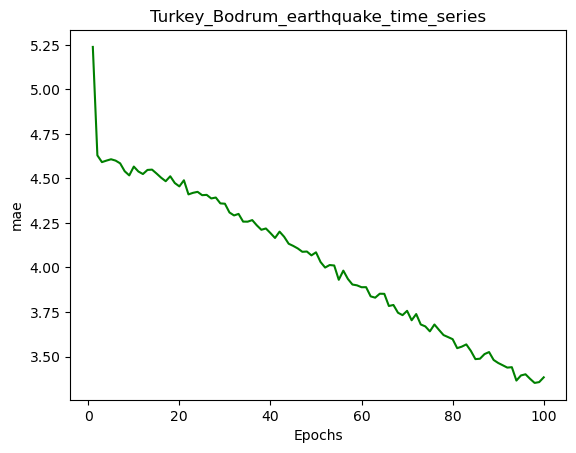

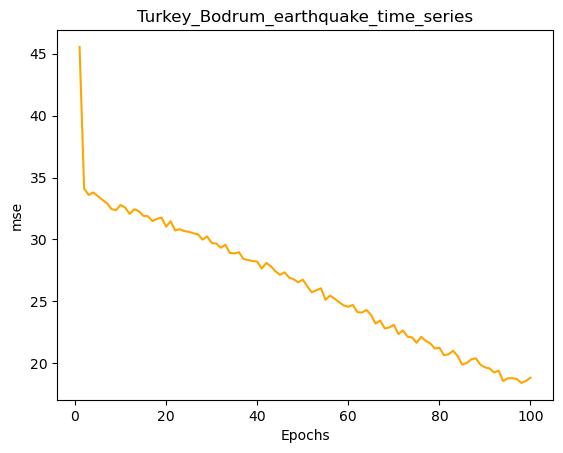

In [313]:
#Visualize models performance.
epoch = range(1,len(history.epoch)+1)
results = history.history
plot(epoch,results['mae'],'green')
xlabel('Epochs')
ylabel('mae')
title('Turkey_Bodrum_earthquake_time_series')
show()
plot(epoch,results['loss'],'orange')
xlabel('Epochs')
ylabel('mse')
title('Turkey_Bodrum_earthquake_time_series')
show()

In [318]:
preds_ts = Create_model2().predict(dataset_ts)
true_preds = preds_ts[idx-30:-1]
mse = mean(mean_squared_error(xts,true_preds).numpy()[0])
mae = mean(mean_absolute_error(xts,true_preds).numpy()[0])
message = 'mse : %2.f , mae : %2.f'%(mse,mae)
print(message)

49/49 [==============================] - 0s 5ms/step
mse : 88 , mae :  7


In [319]:
temp = []
for i in true_preds.ravel():
    if i<0 :
        temp.append(0)
        continue
    temp.append(i)
true_preds = temp

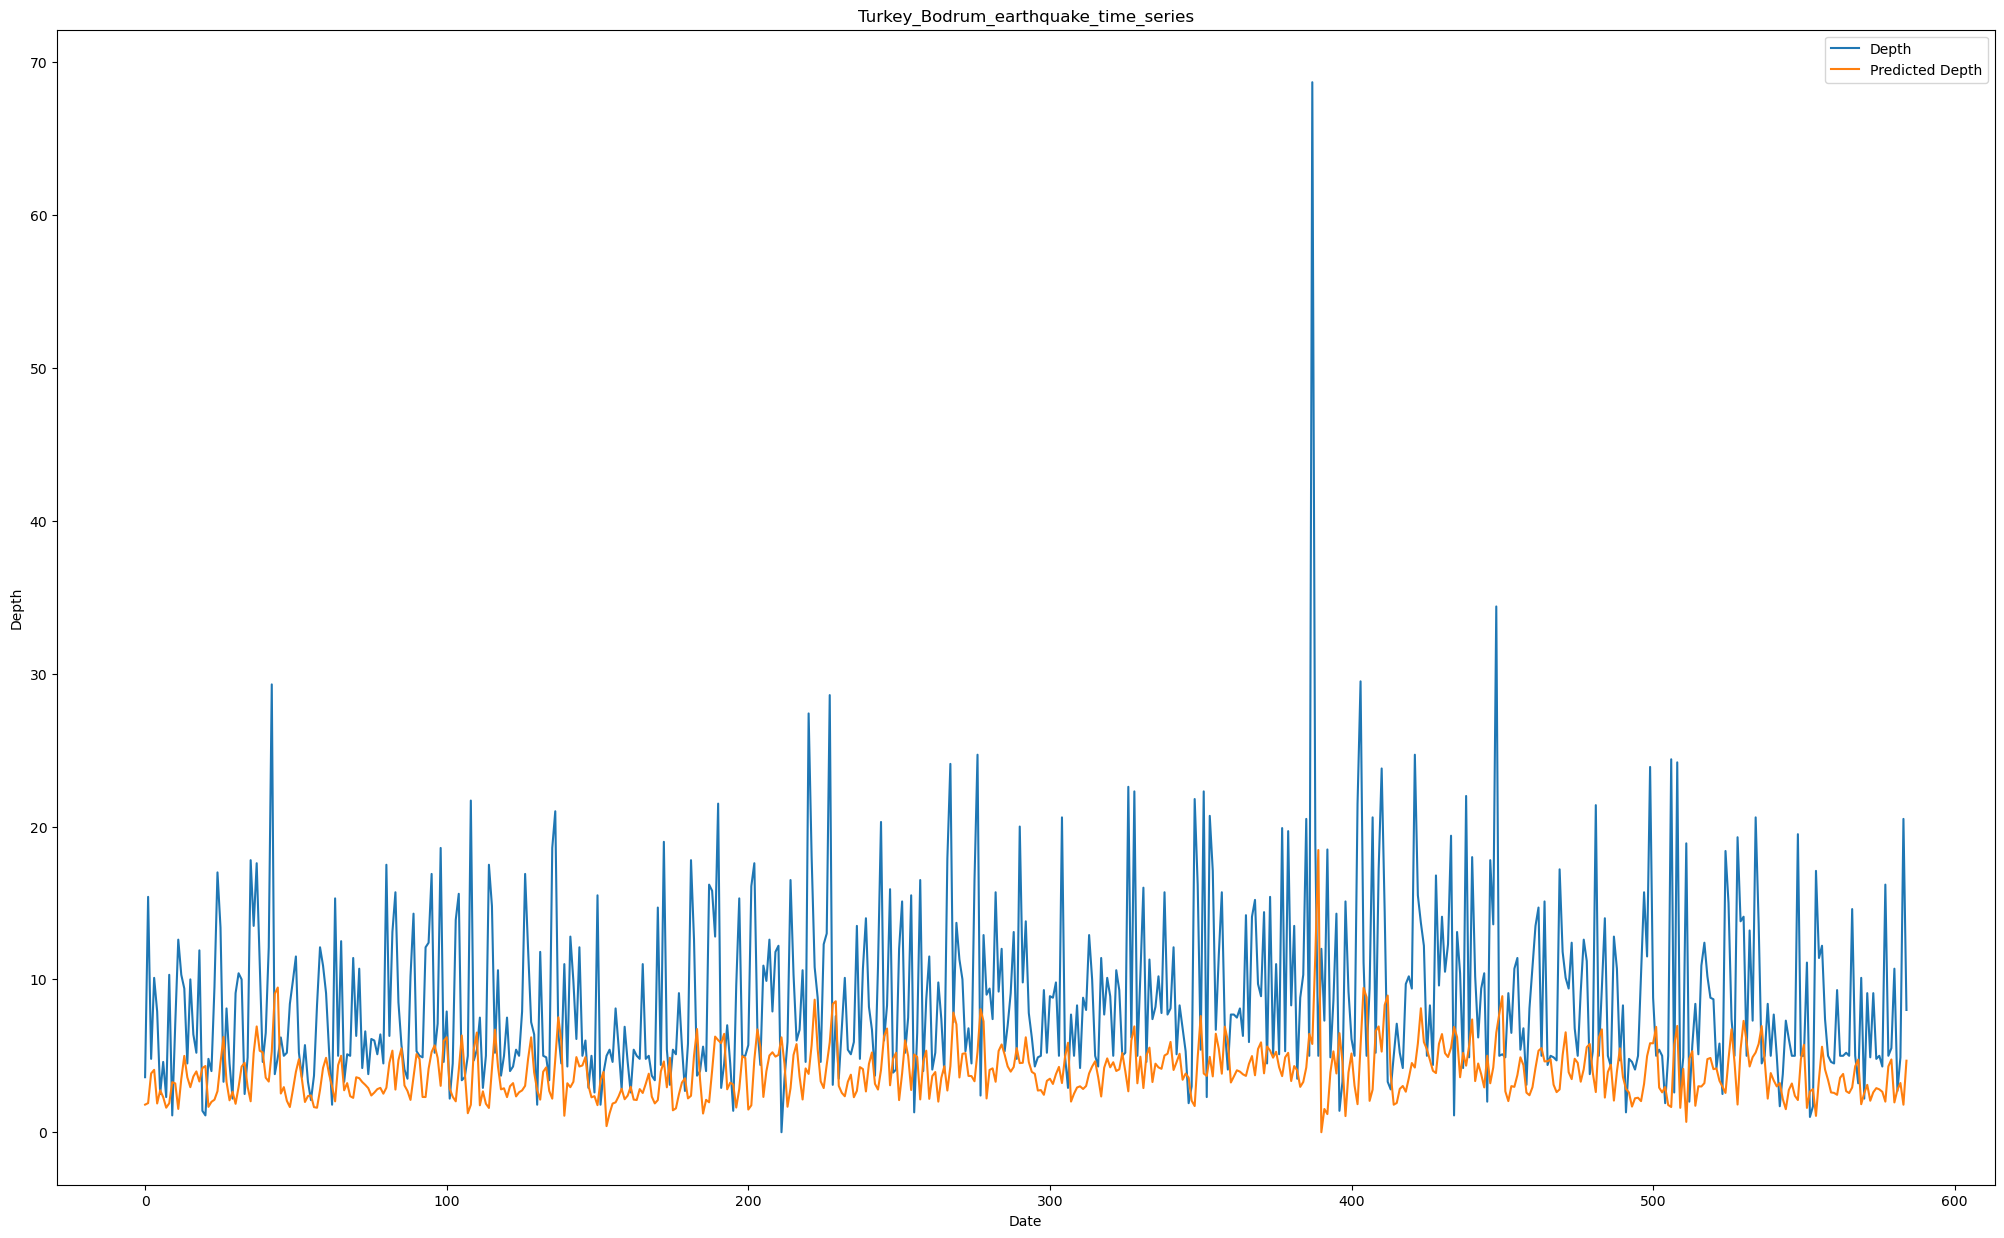

In [320]:
figure(figsize=(25,15))
plot(range(len(xts)),xts)
plot(range(len(true_preds)),true_preds)
title('Turkey_Bodrum_earthquake_time_series')
xlabel('Date')
ylabel('Depth')
legend(['Depth','Predicted Depth'])
show()